<a href="https://colab.research.google.com/github/Saulrega/EDA/blob/main/08_TSA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import quandl
QUANDL_API_KEY = '4sLKuvo8LszEsAF1Kqgr'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [3]:
mydata = quandl.get("FRED/GDP")


In [4]:
mydata

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


In [5]:
df = quandl.get('CHRIS/CME_GC1', column_index=6, collapse='weakly', start_date='2010-01-01')

In [6]:
df['Settle'].resample('MS').ffill().dropna() #agrupamiento por mes  

Date
2010-02-01    1104.3
2010-03-01    1118.3
2010-04-01    1125.1
2010-05-01    1180.7
2010-06-01    1224.8
               ...  
2021-02-01    1866.0
2021-03-01    1725.8
2021-04-01    1728.4
2021-05-01    1767.7
2021-06-01    1902.9
Freq: MS, Name: Settle, Length: 137, dtype: float64

In [7]:
df_settle = df['Settle'].resample('MS').ffill().dropna()

In [8]:
df_rolling = df_settle.rolling(3) 
df_mean = df_rolling.mean()  
df_std = df_rolling.std() 


In [9]:
import matplotlib.pyplot as plt

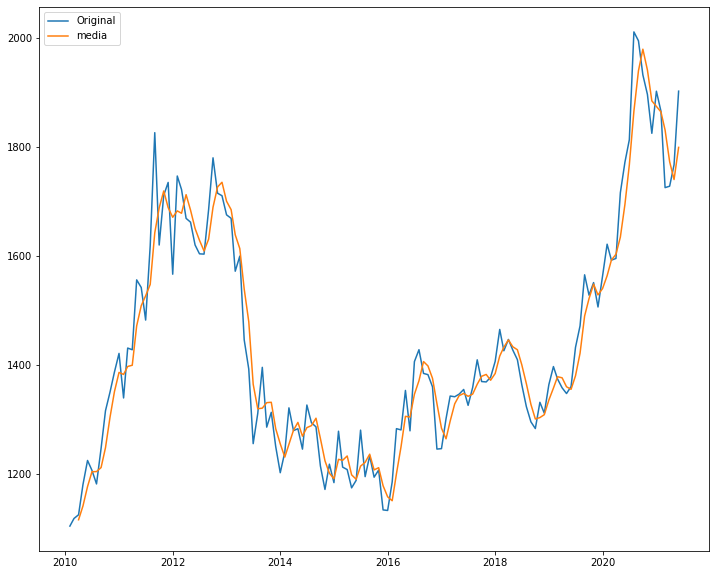

In [10]:
  plt.figure(figsize=(12, 10))
  plt.plot(df_settle, label='Original')
  plt.plot(df_mean, label='media')
  plt.legend()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
decompose_result = seasonal_decompose(df.dropna(), freq=12) #  12 es el número de periodos 
df_trend = decompose_result.trend 
df_season = decompose_result.seasonal
df_residual = decompose_result.resid



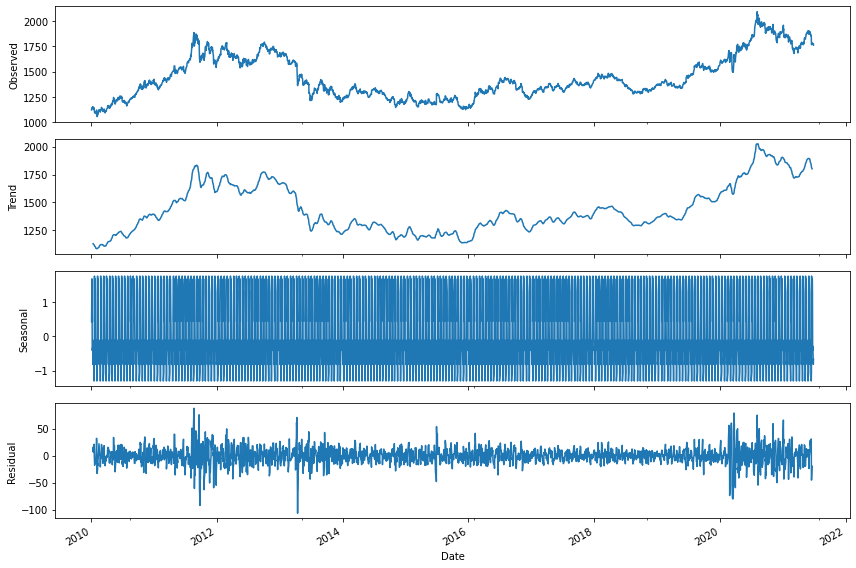

In [13]:
plt.rcParams['figure.figsize'] = (12, 8)
fig = decompose_result.plot()

SARIMAX - Predicción de los valores futuros 


In [14]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [15]:
#determinar si es estacionaria Dickey-Fuller Test

result = adfuller(df['Settle'])


In [16]:

print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

p-value: 0.39693245659615073
Critical Values:
	1%: -3.43262498927583
	5%: -2.8625451360824843
	10%: -2.5673050630393703


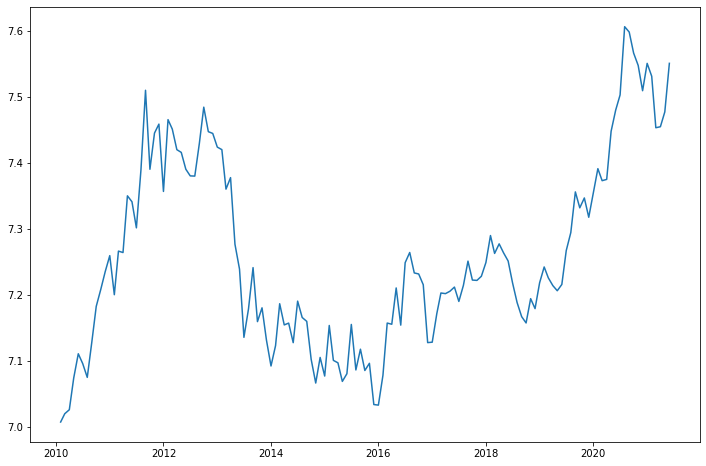

In [17]:
df_log = np.log(df_settle)
plt.plot(df_log)

In [18]:
rolling_mean = df_log.rolling(window=12).mean()
df_mean = df_log - rolling_mean
df_mean.dropna(inplace=True)